In [ ]:

!ls

sample_data


In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cd drive/MyDrive/DeepFaceAndYoloFaceImageRecognition

In [ ]:
%cd drive/MyDrive/DeepFaceAndYoloFaceImageRecognition

/content/drive/MyDrive/DeepFaceAndYoloFaceImageRecognition


In [ ]:
!git clone https://github.com/derronqi/yolov8-face.git

Cloning into 'yolov8-face'...
remote: Enumerating objects: 899, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (369/369), done.
remote: Total 899 (delta 95), reused 242 (delta 48), pack-reused 480
Receiving objects: 100% (899/899), 4.15 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (224/224), done.
Updating files: 100% (371/371), done.


In [1]:
!pip install yolov8face

  Obtaining dependency information for yolov8face from https://files.pythonhosted.org/packages/b2/4b/8aca68652a6f6906b899626e35c32f7270c3d2f0f5adb7b1f93eb1004869/yolov8face-0.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/02/29/7e9d2905d25a7727f7cf56fbf2e79cc36d60481cf3249143eee1b7217f29/ultralytics-8.1.29-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
  Obtaining dependency information for matplotlib>=3.3.0 from https://files.pythonhosted.org/packages/a1/27/8a807464b0cf47fdf3ba8cbb542d4f3a551da0254d7588667857f8a8a88a/matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.me


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


One can get the weights from https://drive.google.com/file/d/1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb/view
The github repo using it is https://github.com/derronqi/yolov8-face 

In [23]:

from os import listdir
from os.path import isfile, join
from PIL import Image
from ultralytics import YOLO

mypath = 'MultiFaceCheck/TestFaces'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
model = YOLO('yolov8n-face.pt')
for face_entry in onlyfiles:
    getPath = mypath + '/' + face_entry
    faceData = Image.open(getPath)
    w, h = faceData.size
    # info = face_entry.stat()
    # print(f'{face_entry},{w},{h}')

    #results = model(faceData, imgsz=(w,h))[0]
    results = model(faceData)[0]
    # bboxes = results.boxes
    print(f'There are {len(results)} detected')
    # for bbox in results:
    #     
    #     # x1,y1,x2,y2 = bbox
    #     print(bbox)



0: 288x640 14 faces, 52.7ms
Speed: 3.5ms preprocess, 52.7ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)
There are 14 detected
0: 544x640 4 faces, 84.1ms
Speed: 4.0ms preprocess, 84.1ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)
There are 4 detected
0: 480x640 1 face, 70.5ms
Speed: 3.0ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
There are 1 detected
0: 448x640 3 faces, 70.3ms
Speed: 3.0ms preprocess, 70.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
There are 3 detected
0: 352x640 21 faces, 60.6ms
Speed: 2.0ms preprocess, 60.6ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)
There are 21 detected



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install deepface

  Obtaining dependency information for deepface from https://files.pythonhosted.org/packages/57/42/1d72cc613f5acf104a964d37290110799e53476ad4044ccc0f983eb6bdd4/deepface-0.0.86-py3-none-any.whl.metadata
  Obtaining dependency information for gdown>=3.10.1 from https://files.pythonhosted.org/packages/cb/56/f4845ed78723a4eb8eb22bcfcb46e1157a462c78c0a5ed318c68c98f9a79/gdown-5.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow>=1.9.0 from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for keras>=2.2.0 from https://files.pythonhosted.org/packages/b0/b2/104733bb67fde86f3d10010f0b5c93cfa1d5bf552f904584cf9e5b3ba719/keras-3.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for Flask>=1.1.2 from https://files.pythonhosted.org/packages/93/a6/aa98bfe0eb9b8b15d36cdfd03c8ca86a03968a87f27ce224fb4f766acb23/flask-3


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:

import numpy as np
from deepface import DeepFace
from os import listdir
from os.path import isfile, join
from PIL import Image
from ultralytics import YOLO

mypath = 'MultiFaceCheck/TestFaces/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
model = YOLO('yolov8n-face.pt')

getPath = mypath + '/' + '12_Group_Group_12_Group_Group_12_102.jpg'
faceData = Image.open(getPath)
w, h = faceData.size
results = model(faceData)[0]
print(f'There are {len(results)} detected')
# results.show()
for res in results:
    getThexyxy = res.boxes.xyxy[0]
    print(getThexyxy)
    x1 = getThexyxy[0].item()
    y1 = getThexyxy[1].item()
    x2 = getThexyxy[2].item()
    y2 = getThexyxy[3].item()
    newIm = faceData.crop((x1, y1, x2, y2))
    newIm.show()
    analyzedAction = DeepFace.analyze(np.array(newIm), actions=['emotion'], detector_backend='yolov8')
    print(analyzedAction)





0: 448x640 3 faces, 66.2ms
Speed: 3.5ms preprocess, 66.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
There are 3 detected
tensor([474.,  95., 602., 277.])
24-03-17 16:11:07 - Downloading Yolo weights from https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb to C:\Users\Testing/.deepface/weights/yolov8n-face.pt...


Downloading...
From: https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb
To: C:\Users\Testing\.deepface\weights\yolov8n-face.pt
100%|██████████| 6.39M/6.39M [00:00<00:00, 20.3MB/s]


24-03-17 16:11:10 - Yolo model is just downloaded to yolov8n-face.pt
24-03-17 16:11:12 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\Testing\.deepface\weights\facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 43.3MB/s]


[{'emotion': {'angry': 0.00028103095246478915, 'disgust': 4.5332121384808935e-15, 'fear': 3.100288255286632e-10, 'happy': 99.92135763168335, 'sad': 0.07762403110973537, 'surprise': 5.714923645427916e-06, 'neutral': 0.0007342349363170797}, 'dominant_emotion': 'happy', 'region': {'x': 1, 'y': 5, 'w': 123, 'h': 171, 'left_eye': (21, 68), 'right_eye': (84, 64)}, 'face_confidence': 0.66}]
tensor([174., 118., 299., 299.])
[{'emotion': {'angry': 2.589504131955689e-11, 'disgust': 6.581406709086817e-17, 'fear': 4.5004088023650006e-15, 'happy': 99.99997615814209, 'sad': 7.878044328002431e-08, 'surprise': 4.121546913100362e-14, 'neutral': 2.405998600352177e-05}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 15, 'w': 115, 'h': 159, 'left_eye': (22, 73), 'right_eye': (80, 76)}, 'face_confidence': 0.73}]
tensor([696., 160., 825., 340.])
[{'emotion': {'angry': 6.01888175204152e-07, 'disgust': 1.8984370763437e-09, 'fear': 9.225660785648784e-08, 'happy': 98.6383020066203, 'sad': 1.84325312675304

There are 3 detected


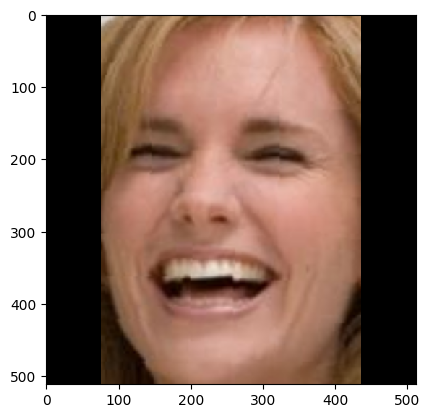

Could not detect a face


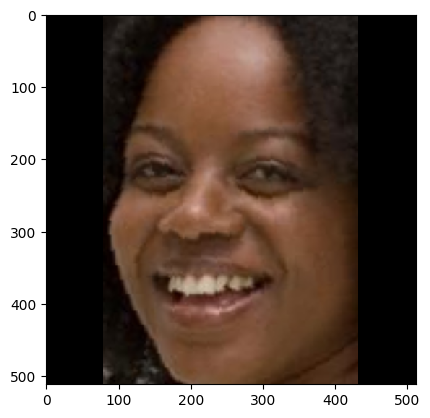

Could not detect a face


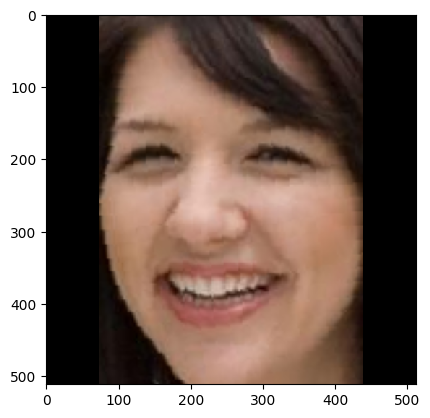

Could not detect a face


In [39]:
%matplotlib inline 
from matplotlib import pyplot as plt
from deepface import DeepFace
from os import listdir
from os.path import isfile, join
from ultralytics import YOLO

mypath = 'MultiFaceCheck/TestFaces/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
model = YOLO('yolov8n-face.pt')

getPath = mypath + '/' + '12_Group_Group_12_Group_Group_12_102.jpg'
faces = DeepFace.extract_faces(getPath, detector_backend='yolov8', target_size=(512, 512))
# faceData = Image.open(getPath)
# w,h = faceData.size
# results = model(faceData)[0]
print(f'There are {len(faces)} detected')
# results.show()
for face in faces:
    # print(face)
    face_represent = face['face']
    plt.imshow(face_represent, interpolation='nearest')
    plt.show()
    try:
        analyzedAction = DeepFace.analyze(face['face'], actions=['emotion'], detector_backend='yolov8')
        print(analyzedAction)
    except:
        print("Could not detect a face")


In [43]:
%matplotlib inline 
from deepface import DeepFace
from os import listdir
from os.path import isfile, join
from ultralytics import YOLO

mypath = 'MultiFaceCheck/TestFaces/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
model = YOLO('yolov8n-face.pt')

getPath = mypath + '/' + '12_Group_Group_12_Group_Group_12_102.jpg'
faces = DeepFace.extract_faces(getPath, detector_backend='yolov8', target_size=(512, 512))
# faceData = Image.open(getPath)
# w,h = faceData.size
# results = model(faceData)[0]
print(f'There are {len(faces)} detected')
# results.show()
for face in faces:
    # print(face)
    face_represent = face['face']
    # plt.imshow(face_represent, interpolation='nearest')
    # plt.show()
    converted = (face_represent * 255).astype(np.uint8)
    Image.fromarray((face_represent * 255).astype(np.uint8)).show()
    try:
        analyzedAction = DeepFace.analyze(converted, actions=['emotion'], detector_backend='yolov8')
        print(analyzedAction)
    except:
        print("Could not detect a face")

There are 3 detected
[{'emotion': {'angry': 0.0006264178409765009, 'disgust': 4.856606128134143e-13, 'fear': 1.5840602484232247e-10, 'happy': 99.91099238395691, 'sad': 0.08832851308397949, 'surprise': 2.973445925244511e-10, 'neutral': 5.306494585965993e-05}, 'dominant_emotion': 'happy', 'region': {'x': 74, 'y': 30, 'w': 348, 'h': 477, 'left_eye': (138, 185), 'right_eye': (318, 179)}, 'face_confidence': 0.67}]
[{'emotion': {'angry': 1.5646561882087466e-13, 'disgust': 6.868498664696323e-19, 'fear': 3.649020635811942e-16, 'happy': 99.99999403953517, 'sad': 2.85135543296564e-09, 'surprise': 2.7130063253494095e-15, 'neutral': 6.229545961795815e-06}, 'dominant_emotion': 'happy', 'region': {'x': 86, 'y': 44, 'w': 333, 'h': 455, 'left_eye': (143, 217), 'right_eye': (306, 211)}, 'face_confidence': 0.68}]
[{'emotion': {'angry': 5.559976422041492e-09, 'disgust': 1.0244607880200432e-13, 'fear': 4.2401111193126976e-10, 'happy': 98.1328426678683, 'sad': 1.8820506276127343e-07, 'surprise': 5.20196272

In [46]:
%matplotlib inline 
from deepface import DeepFace
from os import listdir
from os.path import isfile, join
from ultralytics import YOLO

mypath = 'MultiFaceCheck/TestFaces/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
model = YOLO('yolov8n-face.pt')

getPath = mypath + '/' + '12_Group_Group_12_Group_Group_12_102.jpg'
faces = DeepFace.extract_faces(getPath, detector_backend='yolov8', target_size=(300, 200))
# faceData = Image.open(getPath)
# w,h = faceData.size
# results = model(faceData)[0]
print(f'There are {len(faces)} detected')
# results.show()
for face in faces:
    # print(face)
    face_represent = face['face']
    # plt.imshow(face_represent, interpolation='nearest')
    # plt.show()
    converted = (face_represent * 255).astype(np.uint8)
    try:
        analyzedAction = DeepFace.analyze(converted, actions=['emotion'], enforce_detection=False)
        print(analyzedAction)
    except:
        print("Could not detect a face")

There are 3 detected
[{'emotion': {'angry': 3.787928277002418e-05, 'disgust': 4.8235120978551994e-18, 'fear': 5.442635599164107e-12, 'happy': 99.95608329511185, 'sad': 0.043844105378745814, 'surprise': 2.601805037731158e-08, 'neutral': 3.658154175573865e-05}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 21, 'w': 189, 'h': 263, 'left_eye': (35, 112), 'right_eye': (134, 110)}, 'face_confidence': 0.75}]
[{'emotion': {'angry': 7.2076966750159385e-09, 'disgust': 9.678137368191015e-12, 'fear': 1.33118285620108e-10, 'happy': 99.99982714651985, 'sad': 8.050110036558191e-06, 'surprise': 1.0426227425026646e-12, 'neutral': 0.00016932381058432406}, 'dominant_emotion': 'happy', 'region': {'x': 5, 'y': 27, 'w': 182, 'h': 260, 'left_eye': (38, 127), 'right_eye': (127, 125)}, 'face_confidence': 0.75}]
[{'emotion': {'angry': 2.6611216341621002e-06, 'disgust': 1.9818745169292162e-10, 'fear': 2.7607540697971444e-07, 'happy': 99.06310439109802, 'sad': 1.7123612394698284e-05, 'surprise': 2.96356468

In [45]:
from PIL import ImageDraw, ImageFont


def show_bbox_with_emotion(image: Image, bboxes: dict, do_show=True):
    draw = ImageDraw.Draw(image)
    fnt = ImageFont.truetype("../GlacialIndifference-Regular.otf", 9)
    for bbox in bboxes:
        x1 = int(bbox['x1'])
        y1 = int(bbox['y1'])
        x2 = int(bbox['x2'])
        y2 = int(bbox['y2'])
        draw.rectangle([x1, y1, x2, y2], outline=(0, 255, 0, 85), width=1)
        emotion = f"{bbox['f_i']}_{bbox['emotion']}"
        draw.text((x1, y1), emotion, font=fnt, fill=(255, 0, 0))
    if do_show:
        image.show()
    return image






In [49]:

from deepface import DeepFace
from ultralytics import YOLO

mypath = 'Scraped-Dataset for GroupEmotion'
model = YOLO('yolov8n-face.pt')


def get_emotion(cropped_face):
    analyzed_emotion = DeepFace.analyze(cropped_face, actions=['emotion'], enforce_detection=False)[0]
    return {'emotion': analyzed_emotion['dominant_emotion'],
            'emo_confidence': analyzed_emotion['face_confidence']}


def detect_face(path_to_images, path_to_results):
    inference_results = []
    inferences = model(path_to_images)
    for inference in inferences:
        image_path = inference.path
        for i, detected_face in enumerate(inference):
            given_xyxy = detected_face.boxes.xyxy[0]
            x1 = int(given_xyxy[0].item())
            y1 = int(given_xyxy[1].item())
            x2 = int(given_xyxy[2].item())
            y2 = int(given_xyxy[3].item())
            h, w = inference.orig_shape
            face_box = inference.orig_img[y1:y2, x1:x2]
            emotional_resp = get_emotion(face_box)
            common_file_data = {'image_path': image_path, 'h': h, 'w': w, 'f_i': i}
            xys = {'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2}
            all_facial_results = {**common_file_data, **xys, **emotional_resp}
            inference_results.append(all_facial_results)
    df = pd.DataFrame(inference_results)
    df.to_csv(path_to_results)


def generate():
    detect_face('../data/MultiFaceCheck/TestFaces/', 'face_results_new.csv')


generate()

image 1/5 C:\mywork\ml\deepfaceAndEmotion\MultiFaceCheck\TestFaces\11_Meeting_Meeting_11_Meeting_Meeting_11_281.jpg: 288x640 14 faces, 46.4ms
image 2/5 C:\mywork\ml\deepfaceAndEmotion\MultiFaceCheck\TestFaces\11_Meeting_Meeting_11_Meeting_Meeting_11_36.jpg: 544x640 4 faces, 71.2ms
image 3/5 C:\mywork\ml\deepfaceAndEmotion\MultiFaceCheck\TestFaces\11_Meeting_Meeting_11_Meeting_Meeting_11_925.jpg: 480x640 1 face, 62.7ms
image 4/5 C:\mywork\ml\deepfaceAndEmotion\MultiFaceCheck\TestFaces\12_Group_Group_12_Group_Group_12_102.jpg: 448x640 3 faces, 53.6ms
image 5/5 C:\mywork\ml\deepfaceAndEmotion\MultiFaceCheck\TestFaces\12_Group_Group_12_Group_Group_12_67.jpg: 352x640 21 faces, 51.2ms
Speed: 2.2ms preprocess, 57.0ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


In [44]:
import pandas as pd
from PIL import Image


def visualize(csv_loc, fileName):
    df = pd.read_csv(csv_loc)
    filtered = df.loc[df['image_path'].str.find(fileName) != -1]
    print(filtered)
    list_faces = list(filtered.T.to_dict().values())
    image_loc = list_faces[0]['image_path']
    image = Image.open(image_loc)
    show_bbox_with_emotion(image, list_faces)


resultant = visualize('face_results.csv', '11_Meeting_Meeting_11_Meeting_Meeting_11_281.jpg')
resultant.save("target/11_Meeting_Meeting_11_Meeting_Meeting_11_281.jpg")


    Unnamed: 0                   box  emotion  emo_confidence   x1   y1   x2  \
0            0   [91, 157, 154, 237]    happy               0   91  157  154   
1            1  [723, 125, 763, 170]  neutral               0  723  125  763   
2            2  [438, 135, 483, 190]    happy               0  438  135  483   
3            3  [546, 157, 583, 209]    happy               0  546  157  583   
4            4    [273, 20, 313, 68]     fear               0  273   20  313   
5            5  [807, 148, 851, 199]  neutral               0  807  148  851   
6            6  [265, 121, 318, 192]  neutral               0  265  121  318   
7            7    [162, 30, 205, 84]  neutral               0  162   30  205   
8            8  [632, 119, 668, 159]    happy               0  632  119  668   
9            9  [911, 160, 965, 226]  neutral               0  911  160  965   
10          10    [450, 39, 486, 84]    happy               0  450   39  486   
11          11     [37, 47, 82, 104]    

AttributeError: 'NoneType' object has no attribute 'save'